In [1]:
import numpy as np
import	matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('train.csv')
train.set_index('ID',	inplace=True)

#Magnitudes, para armar colores
H = train.loc[:,'Hmag']
J	= train.loc[:,'Jmag']
U =	train.loc[:,'umag']
G =	train.loc[:,'gmag']
r = train.loc[:,'rmag']
i = train.loc[:,'imag']
z = train.loc[:,'zmag']
Y = train.loc[:,'Ymag']
K = train.loc[:,'Kmag']
W1 =	train.loc[:,'W1mag']
W2 =	train.loc[:,'W2mag']

#Radios donde se encierra la mitad de la luz

Y_r =	train.loc[:,'Yhlr']
J_r =	train.loc[:,'Jhlr']
H_r =	train.loc[:,'Hhlr']
K_r =	train.loc[:,'Khlr']

#Magnitud en apertura fija de 3''

U3 =	train.loc[:,'u3mag']
G3 =	train.loc[:,'g3mag']
r3 =	train.loc[:,'r3mag']
i3 =	train.loc[:,'i3mag']
Z3	=	train.loc[:,'Z3mag']
Y3	=	train.loc[:,'Y3mag']
J3	=	train.loc[:,'J3mag']
H3	=	train.loc[:,'H3mag']
K3	=	train.loc[:,'K3mag']

#Coordenadas

ra = train.loc[:,'RAdeg']
dec = train.loc[:,'DEdeg']

#Clases para entrenar

clase	= train.loc[:,'Hclass'] #0: Estrella, 1: Galaxia, 2: QSO

#Tiro los Nans
mask_y	= Y_r > -98
mask_J = J_r > -98
mask_H	= H_r > -98
mask_K = K_r > -98
mask_total = mask_y & mask_J & mask_H & mask_K

train	= train[mask_total]


# Agregar columnas U-G, G-R, J3/J_r y Y3/Y_r
train['U-G'] = U - G
train['G-R'] = G - r
train['J3*J_r'] = J3 / J_r
train['Y3_Y_r'] = Y3 / Y_r

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report

df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)
X_train = df_train.drop('Hclass', axis=1)
Y_train	= df_train['Hclass']
X_test	= df_test.drop('Hclass', axis=1)
Y_test	= df_test['Hclass']


clf = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='weighted'))

[[1582   55   33]
 [   5 7185   34]
 [  25   79  769]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1670
           1       0.98      0.99      0.99      7224
           2       0.92      0.88      0.90       873

    accuracy                           0.98      9767
   macro avg       0.96      0.94      0.95      9767
weighted avg       0.98      0.98      0.98      9767

0.9761105056881364


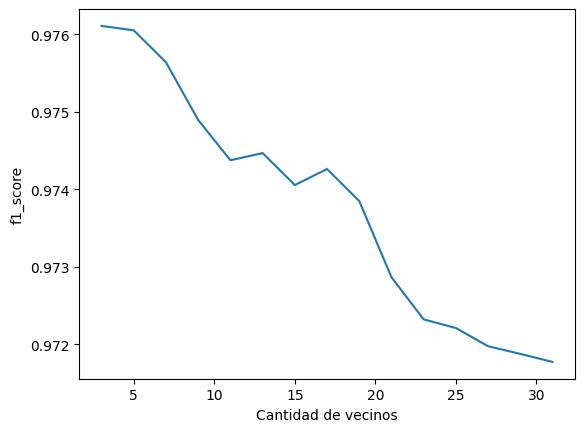

In [12]:
cantidad = 15
f1 = np.zeros(cantidad)
x = [3 + 2 * i for i in range(cantidad)]
for i in range(cantidad):
	clf = KNeighborsClassifier(n_neighbors=3 + 2 * i, weights='distance', n_jobs=-1)
	clf.fit(X_train, Y_train)
	y_pred = clf.predict(X_test)
	f1[i] = f1_score(Y_test, y_pred, average='weighted')

plt.plot(x, f1)
plt.xlabel('Cantidad de vecinos')
plt.ylabel('f1_score')
plt.show()

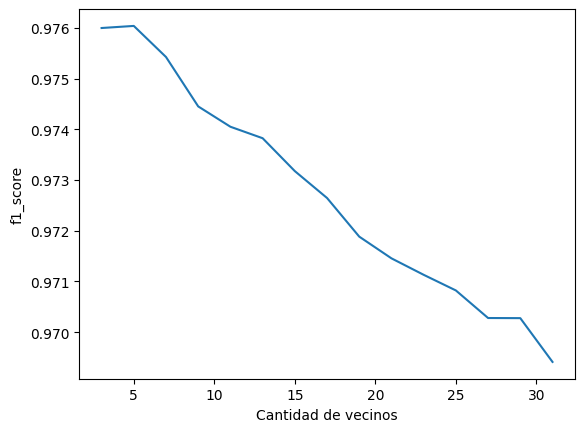

In [13]:
cantidad = 15
f1 = np.zeros(cantidad)
x = [3 + 2 * i for i in range(cantidad)]
for i in range(cantidad):
	clf = KNeighborsClassifier(n_neighbors=3 + 2 * i, weights='uniform', n_jobs=-1)
	clf.fit(X_train, Y_train)
	y_pred = clf.predict(X_test)
	f1[i] = f1_score(Y_test, y_pred, average='weighted')

plt.plot(x, f1)
plt.xlabel('Cantidad de vecinos')
plt.ylabel('f1_score')
plt.show()

En general, no es bueno para esto

In [14]:
from sklearn.linear_model import SGDClassifier

clf2 = SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=-1)
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='weighted'))

[[1520   72   78]
 [  87 7019  118]
 [  37   81  755]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1670
           1       0.98      0.97      0.98      7224
           2       0.79      0.86      0.83       873

    accuracy                           0.95      9767
   macro avg       0.90      0.92      0.91      9767
weighted avg       0.95      0.95      0.95      9767

0.9520827698639099


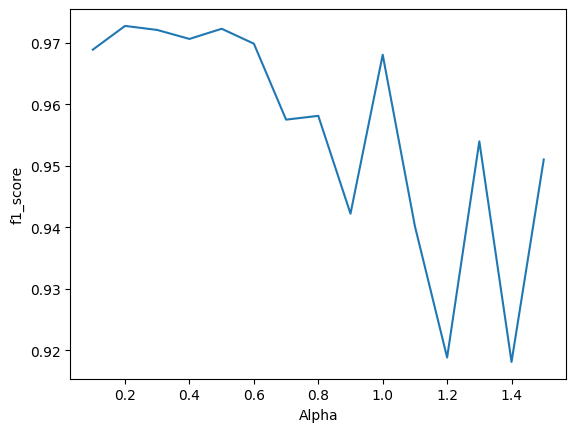

In [16]:
for i in range(1, cantidad + 1):
	clf2 = SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=-1, alpha=0.1 * i)
	clf2.fit(X_train, Y_train)
	y_pred = clf2.predict(X_test)
	f1[i - 1] = f1_score(Y_test, y_pred, average='weighted')

plt.plot([0.1 * i for i in range(1, cantidad + 1)], f1)
plt.xlabel('Alpha')
plt.ylabel('f1_score')
plt.show()


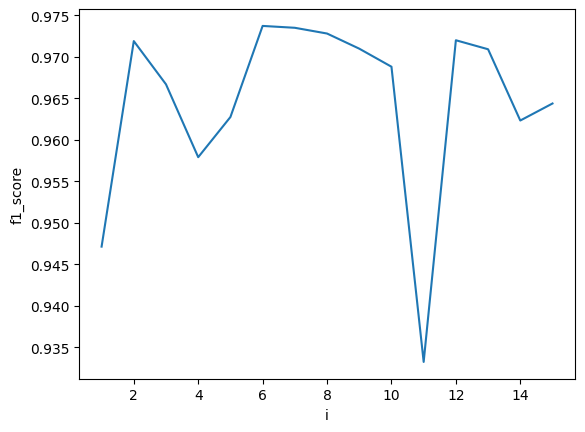

In [25]:
for i in range(1, cantidad + 1):
	clf2 = SGDClassifier(max_iter=1000, tol=(1e-3)/(10*i), n_jobs=-1, alpha=0.2)
	clf2.fit(X_train, Y_train)
	y_pred = clf2.predict(X_test)
	f1[i - 1] = f1_score(Y_test, y_pred, average='weighted')

x= [i for i in range(1, cantidad + 1)]

plt.plot(x, f1)
plt.xlabel('i')
plt.ylabel('f1_score')
plt.show()

In [26]:
clf3 = SGDClassifier(max_iter=1000, tol=(1e-3)/(10*6), n_jobs=-1, alpha=0.2)
clf3.fit(X_train, Y_train)
y_pred = clf3.predict(X_test)
print(f1_score(Y_test, y_pred, average='weighted'))

0.9619204569073717


Estos son malos también, descartados K vecinos y Descenso por el gradiente estocástico